<a href="https://colab.research.google.com/github/m-riddle-codes/ARA/blob/main/001_pd1pdl1_data_acquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:


This notebook, adapted from Talktorials by TeachOpenCADD, will guide you through retrieving molecules tested against a specific target (PD1/PDL1 complex) from the ChEMBL Database. If you're a beginner, don’t worry! Follow along, run the cells, and observe the outputs. With practice, the process will become more familiar.


---



# Acknowledgments:
Gratitude is extended to Dr. Andrea Volkamer and the TeachOpenCADD platform for their invaluable resources and support. For more details on TeachOpenCADD, refer to their publication available [here.](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-019-0351-x)

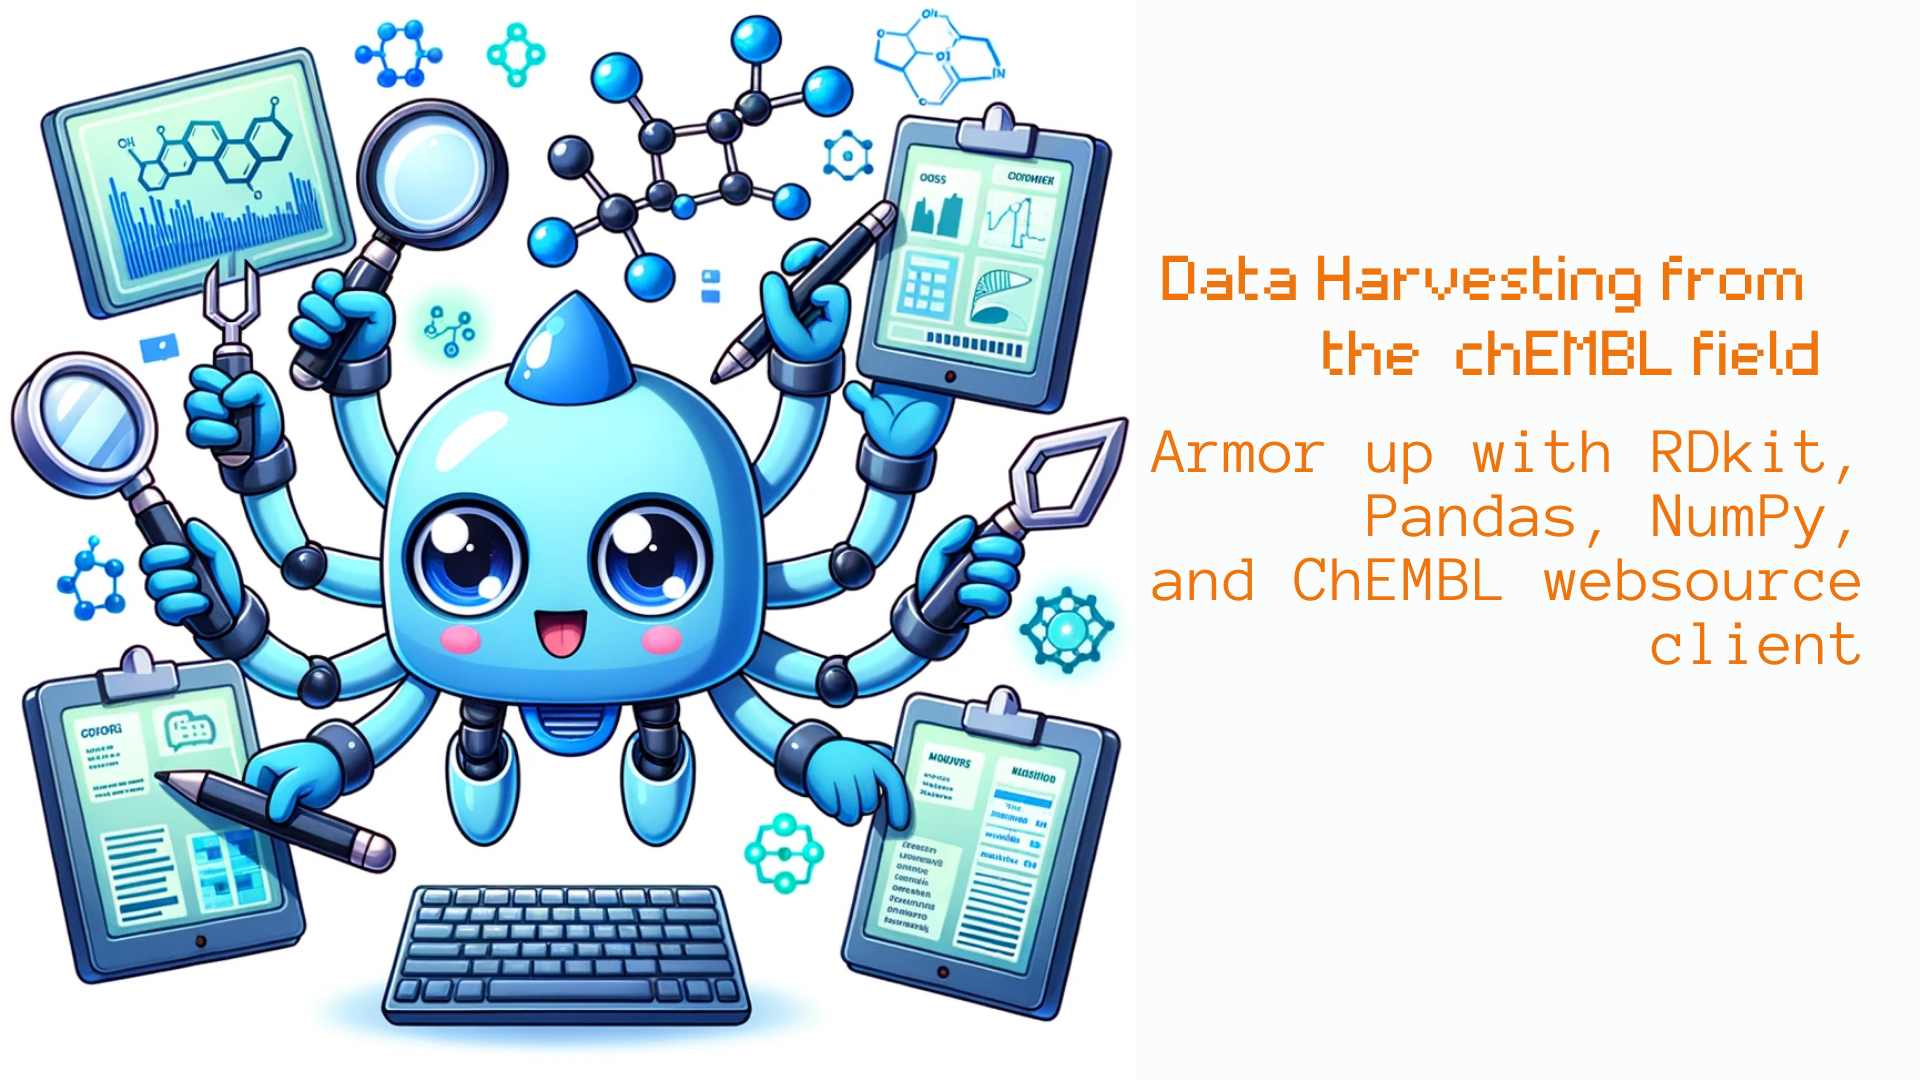

In [ ]:
# @title Default title text
from IPython.display import Image
Image(filename='notebook1.png')


# Getting Started:
Click the Play button on the left side of each code cell to execute it. Let’s begin by installing the necessary packages.


---



# Installing RDKit
RDKit is an open-source software suite that aids in handling and analyzing chemical information, including the visualization and analysis of chemical structures and data. In this section, we initiate the installation of RDKit to equip our notebook with the capabilities to process and analyze chemical information effectively.

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 53.2 MB/s eta 0:00:00


# Installing ChEMBL Web Resource Client

To interact with the ChEMBL database and access a plethora of bioactive molecules with detailed bioactivity data, we install the ChEMBL web resource client. This client serves as a bridge, enabling the retrieval of data necessary for our analysis.

In [ ]:
!pip install chembl-webresource-client

# Importing Required Libraries

Several libraries and modules are essential for our analysis:

* The math' library offers a collection of mathematical functions.
* 'numpy, aliased as np, aids in numerical computations.
* 'pandas, aliased as pd, is pivotal for data handling and analysis.
* PandasTools from rdkit.Chem integrates RDKit with pandas for efficient chemical data handling.
* new_client from chembl_webresource_client.new_client facilitates access to the ChEMBL database.
* tqdm from tqdm.auto provides real-time feedback by displaying progress bars during extensive computations or loops.

In [ ]:
import math
import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm

# Initializing API Clients

Three API clients are initialized to facilitate the retrieval of data from the ChEMBL database:

* targets_api for molecular targets data
* compounds_api for chemical compounds data
* bioactivities_api for bioactivity data

In [ ]:
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity

# Identifying the Molecular Target with UniProt ID

The UniProt ID "Q15116" is specified to identify our molecular target, PD-1. This unique identifier is crucial for retrieving detailed and specific data from the database.

For additional details and in-depth information about PD-1, you can visit the UniProt website by following this link: https://www.uniprot.org/uniprotkb/Q15116/entry

In [ ]:
uniprot_id = "Q15116"

# Retrieving and Formatting Target Data

Data related to our specified molecular target is retrieved from the ChEMBL database. Specific attributes of interest are selected, and the data is converted into a pandas DataFrame for efficient handling and analysis.

In [ ]:
targets = targets_api.get(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'The type of the targets is "{type(targets)}"')

The type of the targets is "<class 'chembl_webresource_client.query_set.QuerySet'>"


In [ ]:
targets = pd.DataFrame.from_records(targets)
targets

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Programmed cell death protein 1,CHEMBL3307223,SINGLE PROTEIN
1,Homo sapiens,Programmed cell death protein 1,CHEMBL3307223,SINGLE PROTEIN
2,Homo sapiens,Programmed cell death protein 1/Programmed cel...,CHEMBL4523993,PROTEIN COMPLEX


# Selecting a Specific Data Record
The third record from the retrieved target data is selected. This specific data pertains to the PD1/PDL1 complex, which is the focus of our analysis.

In [ ]:
target = targets.iloc[2]
target

organism                                                 Homo sapiens
pref_name           Programmed cell death protein 1/Programmed cel...
target_chembl_id                                        CHEMBL4523993
target_type                                           PROTEIN COMPLEX
Name: 2, dtype: object

In [ ]:
chembl_id = target.target_chembl_id
print(f"The target ChEMBL ID is {chembl_id}")

The target ChEMBL ID is CHEMBL4523993


# Retrieving and Formatting Bioactivity Data


The bioactivities_api.filter() function is employed to extract bioactivity data that meets the specified conditions.

The filter parameters include:
* target_chembl_id=chembl_id: Fetches data related to a particular target identified by its ChEMBL ID.
* type="IC50": Filters the data to include only records associated with IC50 values, which represent the concentration of a compound required to inhibit a biological process by half.
* relation="=": Ensures that only data with an exact relation (equality) is retrieved.
* assay_type="B": Specifies the type of assay data to be included in the retrieval.
* The .only() function specifies the data columns to be extracted. These columns include activity ID, assay ChEMBL ID, assay description, assay type, molecule ChEMBL ID, type of bioactivity, standard units, relation, standard value, target ChEMBL ID, and target organism.



---



The print() function is used to display the total number of records retrieved (len(bioactivities)) and the data type of the bioactivities object (type(bioactivities)). This is instrumental for a preliminary assessment of the retrieved data's volume and structure.

In [ ]:
bioactivities = bioactivities_api.filter(
    target_chembl_id=chembl_id, type="IC50", relation="=", assay_type="B"
).only(
    "activity_id",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",
)

print(f"Length and type of bioactivities object: {len(bioactivities)}, {type(bioactivities)}")

Length and type of bioactivities object: 622, <class 'chembl_webresource_client.query_set.QuerySet'>


Let's do a quick inspection of the first element in the bioactivities dataset. It prints the length and data type of the first element, offering insights into its structure. The actual content of the first element is then displayed, giving a snapshot of the data attributes and values.

In [ ]:
print(f"Length and type of first element: {len(bioactivities[0])}, {type(bioactivities[0])}")
bioactivities[0]

Length and type of first element: 13, <class 'dict'>


{'activity_id': 18884511,
 'assay_chembl_id': 'CHEMBL4312946',
 'assay_description': 'Inhibition of human Fc-tagged PD1 N-terminal domain (Leu25 to Gln167 residues) expressed in HEK293 cells/human His-tagged PDL1 (Phe19 to Arg238 residues) expressed in HEK293 cells protein-protein interaction after 1 hr by APC-labeled anti-His antibody/Eu-labeled anti-human IgG based HTRF assay',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL4089730',
 'relation': '=',
 'standard_units': 'nM',
 'standard_value': '96.0',
 'target_chembl_id': 'CHEMBL4523993',
 'target_organism': 'Homo sapiens',
 'type': 'IC50',
 'units': 'nM',
 'value': '96.0'}

The first five rows of the bioactivity data DataFrame are then displayed. This preview offers insights into the data’s structure and content, preparing us for subsequent analyses.

In [ ]:
bioactivities_df = pd.DataFrame.from_dict(bioactivities)
print(f"DataFrame shape: {bioactivities_df.shape}")
bioactivities_df.head()

DataFrame shape: (622, 13)


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,18884511,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4089730,=,nM,96.0,CHEMBL4523993,Homo sapiens,IC50,nM,96.0
1,18884512,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4516321,=,nM,2.5,CHEMBL4523993,Homo sapiens,IC50,nM,2.5
2,18884513,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4436703,=,nM,2.2,CHEMBL4523993,Homo sapiens,IC50,nM,2.2
3,18884514,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4525587,=,nM,25.0,CHEMBL4523993,Homo sapiens,IC50,nM,25.0
4,18884515,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4575618,=,nM,3.0,CHEMBL4523993,Homo sapiens,IC50,nM,3.0


Now, let's use 'shape' to get information about the dimensions of the DataFrame, specifically the number of rows and columns.

In [ ]:
bioactivities_df.shape

(622, 13)

The DataFrame contains columns like standard_units/units and standard_values/values. However, to maintain consistency, the non-standard units and value columns are removed. Let's view what are the other units that are present in the dataset.

In [ ]:
bioactivities_df["units"].unique()

array(['nM', 'uM', 'pM', "10'-4M", 'mM'], dtype=object)

In [ ]:
unit_counts = bioactivities_df["units"].value_counts()
print(unit_counts)

nM        510
uM        108
pM          2
10'-4M      1
mM          1
Name: units, dtype: int64


In [ ]:
unit_counts = bioactivities_df["standard_units"].value_counts()
print(unit_counts)

nM    622
Name: standard_units, dtype: int64


In [ ]:
bioactivities_df.drop(["units", "value"], axis=1, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,18884511,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4089730,=,nM,96.0,CHEMBL4523993,Homo sapiens,IC50
1,18884512,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4516321,=,nM,2.5,CHEMBL4523993,Homo sapiens,IC50
2,18884513,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4436703,=,nM,2.2,CHEMBL4523993,Homo sapiens,IC50
3,18884514,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4525587,=,nM,25.0,CHEMBL4523993,Homo sapiens,IC50
4,18884515,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4575618,=,nM,3.0,CHEMBL4523993,Homo sapiens,IC50


Now, we will preprocess and filter bioactivity data.

We will:

1. Convert standard_value’s datatype from object to float

2. Delete entries with missing values

3. Keep only entries with standard_unit == nM

4. Delete duplicate molecules

5. Reset DataFrame index

6. Rename columns



---



bioactivities_df: This is the DataFrame in which your data is stored. It consists of rows and columns, where each column represents a specific attribute or variable, and each row represents a data point.

.dtypes: This is an attribute of a Pandas DataFrame that, when accessed, returns a Series object. The Series object contains the data types of each column in the DataFrame.

When you use bioactivities_df.dtypes, you get a Series where the index contains the column names, and the values indicate the data types associated with each column. The data types can include, but are not limited to:


* int64: Integer values (e.g., 1, 2, 3).
* float64: Floating-point or decimal values (e.g., 3.14, 2.71).
*  object: Typically, this represents strings or mixed data types.
* datetime64: Date and time values.

In [ ]:
bioactivities_df.dtypes

activity_id            int64
assay_chembl_id       object
assay_description     object
assay_type            object
molecule_chembl_id    object
relation              object
standard_units        object
standard_value        object
target_chembl_id      object
target_organism       object
type                  object
dtype: object

Let's pause here for a moment.


As we can observe, the 'standard_value' field contains standardized values, particularly IC50 values.

**OMG! what does that mean?**

To ensure these values are suitable for future calculations, we need to convert them from their current 'object' data type to 'floats.'

This data type conversion allows for accurate numerical operations and analysis in our next steps.

In [ ]:
bioactivities_df = bioactivities_df.astype({"standard_value": "float64"})
bioactivities_df.dtypes

activity_id             int64
assay_chembl_id        object
assay_description      object
assay_type             object
molecule_chembl_id     object
relation               object
standard_units         object
standard_value        float64
target_chembl_id       object
target_organism        object
type                   object
dtype: object

**Amazing!**

Now we get to have our standard_value changed from object to float64


---



As we continue to explore our data here, we need to delete or handle missing entries (also known as missing values or NaNs)

This is important for several reasons:

* Data Integrity: Missing values can lead to inaccurate or biased analyses if not properly addressed. By deleting rows or columns with missing data, you ensure the integrity of the dataset, and your analyses are based on complete and reliable information.

* Statistical Analyses: Many statistical and machine learning algorithms cannot handle missing values. They may produce errors or biased results if missing data is not properly handled. Deleting missing entries is often the simplest way to prepare data for these methods.

* Visualization: Missing data can affect the quality and interpretability of data visualizations. Charts and plots may not accurately represent the data's characteristics when missing values are present. Removing them can lead to more meaningful visualizations.

In [ ]:
bioactivities_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (622, 11)


We will keep only entries with “standard_unit == nM”

Keeping only entries with "standard_unit == nM" serves a specific purpose in our data analysis, particularly in the context of bioactivity data.

In bioactivity data, the unit of measurement for activities, such as IC50, Ki, or EC50, can vary. Common units include nanomolar (nM), micromolar (µM), and picomolar (pM), among others. To perform consistent and meaningful analyses, it's essential to work with a uniform unit. In this case, "nM" is chosen for consistency.

In [ ]:
print(f"Units in downloaded data: {bioactivities_df['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {bioactivities_df[bioactivities_df['standard_units'] != 'nM'].shape[0]}"
)

Units in downloaded data: ['nM']
Number of non-nM entries:    0


Amazing! Since there are no non-nM entries, our size of data remains the same. Let's check that by running the next cell

In [ ]:
bioactivities_df = bioactivities_df[bioactivities_df["standard_units"] == "nM"]
print(f"Units after filtering: {bioactivities_df['standard_units'].unique()}")

Units after filtering: ['nM']


In [ ]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (622, 11)


See? We still got 622 rows

In [ ]:
bioactivities_df

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,18884511,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4089730,=,nM,96.0,CHEMBL4523993,Homo sapiens,IC50
1,18884512,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4516321,=,nM,2.5,CHEMBL4523993,Homo sapiens,IC50
2,18884513,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4436703,=,nM,2.2,CHEMBL4523993,Homo sapiens,IC50
3,18884514,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4525587,=,nM,25.0,CHEMBL4523993,Homo sapiens,IC50
4,18884515,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4575618,=,nM,3.0,CHEMBL4523993,Homo sapiens,IC50
...,...,...,...,...,...,...,...,...,...,...,...
617,24917379,CHEMBL5165092,Inhibition of human PD-1/PD-L1 interaction in ...,B,CHEMBL5203947,=,nM,98.0,CHEMBL4523993,Homo sapiens,IC50
618,24917380,CHEMBL5165092,Inhibition of human PD-1/PD-L1 interaction in ...,B,CHEMBL5194902,=,nM,4.0,CHEMBL4523993,Homo sapiens,IC50
619,24917381,CHEMBL5165092,Inhibition of human PD-1/PD-L1 interaction in ...,B,CHEMBL374252,=,nM,92.0,CHEMBL4523993,Homo sapiens,IC50
620,24917382,CHEMBL5165092,Inhibition of human PD-1/PD-L1 interaction in ...,B,CHEMBL5194957,=,nM,9.0,CHEMBL4523993,Homo sapiens,IC50


At times, a single molecule, identified by its unique 'molecule_chembl_id,' may undergo testing in multiple assay experiments. In such cases, it's valuable to calculate the mean (average) value of all assay results associated with that particular compound.

This approach aggregates data and provides a representative measure for the compound's bioactivity, accounting for any variability in multiple tests.

In [ ]:
grouped_df = bioactivities_df.groupby('molecule_chembl_id').agg({
    'standard_value': 'mean'
}).reset_index()

# Merge the grouped DataFrame back to the original DataFrame to align other columns
bioactivities_df = bioactivities_df.drop('standard_value', axis=1).drop_duplicates('molecule_chembl_id')
bioactivities_df = pd.merge(bioactivities_df, grouped_df, on='molecule_chembl_id', how='inner')

# Display the updated DataFrame
print("\nDataFrame after removing duplicates and taking the mean of standard_value:")
print(bioactivities_df)


DataFrame after removing duplicates and taking the mean of standard_value:
     activity_id assay_chembl_id  \
0       18884511   CHEMBL4312946   
1       18884512   CHEMBL4312946   
2       18884513   CHEMBL4312946   
3       18884514   CHEMBL4312946   
4       18884515   CHEMBL4312946   
..           ...             ...   
565     24917378   CHEMBL5165092   
566     24917379   CHEMBL5165092   
567     24917380   CHEMBL5165092   
568     24917381   CHEMBL5165092   
569     24917382   CHEMBL5165092   

                                     assay_description assay_type  \
0    Inhibition of human Fc-tagged PD1 N-terminal d...          B   
1    Inhibition of human Fc-tagged PD1 N-terminal d...          B   
2    Inhibition of human Fc-tagged PD1 N-terminal d...          B   
3    Inhibition of human Fc-tagged PD1 N-terminal d...          B   
4    Inhibition of human Fc-tagged PD1 N-terminal d...          B   
..                                                 ...        ...   
565  Inh

Now, we are left with 570 entries after calculating the average for compounds with multiple entries.

In [ ]:
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,target_chembl_id,target_organism,type,standard_value
0,18884511,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4089730,=,nM,CHEMBL4523993,Homo sapiens,IC50,47.770556
1,18884512,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4516321,=,nM,CHEMBL4523993,Homo sapiens,IC50,2.500000
2,18884513,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4436703,=,nM,CHEMBL4523993,Homo sapiens,IC50,2.200000
3,18884514,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4525587,=,nM,CHEMBL4523993,Homo sapiens,IC50,75.000000
4,18884515,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4575618,=,nM,CHEMBL4523993,Homo sapiens,IC50,3.000000


In [ ]:
bioactivities_df.rename(
    columns={"standard_value": "IC50", "standard_units": "units"}, inplace=True
)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,units,target_chembl_id,target_organism,type,IC50
0,18884511,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4089730,=,nM,CHEMBL4523993,Homo sapiens,IC50,47.770556
1,18884512,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4516321,=,nM,CHEMBL4523993,Homo sapiens,IC50,2.500000
2,18884513,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4436703,=,nM,CHEMBL4523993,Homo sapiens,IC50,2.200000
3,18884514,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4525587,=,nM,CHEMBL4523993,Homo sapiens,IC50,75.000000
4,18884515,CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,CHEMBL4575618,=,nM,CHEMBL4523993,Homo sapiens,IC50,3.000000


In this code, we performed two specific actions on the bioactivities_df DataFrame:

Column Renaming: We used the rename method to rename two columns in the DataFrame. Specifically, we renamed the columns "standard_value" and "standard_units" to "IC50" and "units," respectively. This means that from this point forward, the DataFrame will have "IC50" as the new name for the "standard_value" column and "units" as the new name for the "standard_units" column. The columns parameter in the rename method is a dictionary where keys are the current column names, and values are the new names.

In-Place Operation: By setting inplace=True, we applied these column name changes directly to the original DataFrame (bioactivities_df) without needing to create a new DataFrame. This is an efficient way to modify column names when working with large datasets.

In [ ]:
bioactivities_df.shape

(570, 11)

Now, our objective is to retrieve the molecular structures of the compounds associated with the respective bioactivity ChEMBL IDs.

This step involves fetching compound data from ChEMBL, specifically the ChEMBL IDs and corresponding molecular structures for the compounds that are linked to our previously filtered bioactivity data.

To achieve this, we perform the following actions:

Fetching Compound Data from ChEMBL: We use the compounds_api to retrieve compound data. In this step, we filter for compounds whose ChEMBL IDs match those found in our filtered bioactivity data. This ensures that we obtain data for the compounds of interest. We specifically request the 'molecule_chembl_id' and 'molecule_structures' for these compounds.

Building a List of Compounds: We collect this compound data into a list for further processing. The tqdm function is used to provide a progress bar for tracking the retrieval process, especially useful when working with large datasets.

In [ ]:
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in=list(bioactivities_df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

In [ ]:
compounds = list(tqdm(compounds_provider))

  0%|          | 0/570 [00:00<?, ?it/s]

In [ ]:
compounds_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (570, 2)


In [ ]:
compounds_df.head()

,molecule_chembl_id,molecule_structures
0,CHEMBL374252,{'canonical_smiles': 'CC1=NN(c2ccccn2)C(=O)C1'...
1,CHEMBL1630488,{'canonical_smiles': 'COc1ccc(Nc2nnc(-c3ccc([N...
2,CHEMBL3582252,{'canonical_smiles': 'COc1cc(OCc2cccc(-c3ccccc...
3,CHEMBL4062686,{'canonical_smiles': 'Cc1c(COc2cc(F)c(CNC[C@@H...
4,CHEMBL4071326,{'canonical_smiles': 'Cc1c(COc2cc(OCc3cccc(C#N...


**We will now preprocess and filter compound data**

1. Remove entries with missing entries

2. Delete duplicate molecules (by molecule_chembl_id)

3. Get molecules with canonical SMILES

4. Remove entries with missing molecule structure entry

# 1. Remove entries with missing molecule structure entry

In [ ]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (570, 2)


# 3. Get molecules with canonical SMILES

In [ ]:
compounds_df.iloc[0].molecule_structures.keys()

dict_keys(['canonical_smiles', 'molfile', 'standard_inchi', 'standard_inchi_key'])

In [ ]:
canonical_smiles = []

for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"] = canonical_smiles
compounds_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (570, 2)


In [ ]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (570, 2)


In [ ]:
print(f"Bioactivities filtered: {bioactivities_df.shape[0]}")
bioactivities_df.columns

Bioactivities filtered: 570


Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'units', 'target_chembl_id',
       'target_organism', 'type', 'IC50'],
      dtype='object')

In [ ]:
print(f"Compounds filtered: {compounds_df.shape[0]}")
compounds_df.columns

Compounds filtered: 570


Index(['molecule_chembl_id', 'smiles'], dtype='object')

Merge values of interest from bioactivities_df and compounds_df in an output_df based on the compounds’ ChEMBL IDs (molecule_chembl_id), keeping the following columns:

ChEMBL IDs: molecule_chembl_id

SMILES: smiles

units: units

IC50: IC50

In [ ]:
# Merge DataFrames
output_df = pd.merge(
    bioactivities_df[["molecule_chembl_id", "IC50", "units"]],
    compounds_df,
    on="molecule_chembl_id",
)

# Reset row indices
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")

Dataset with 570 entries.


In [ ]:
output_df.dtypes

molecule_chembl_id     object
IC50                  float64
units                  object
smiles                 object
dtype: object

In [ ]:
output_df.head(10)

,molecule_chembl_id,IC50,units,smiles
0,CHEMBL4089730,47.770556,nM,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O
1,CHEMBL4516321,2.500000,nM,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...
2,CHEMBL4436703,2.200000,nM,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...
3,CHEMBL4525587,75.000000,nM,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...
4,CHEMBL4575618,3.000000,nM,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...
5,CHEMBL4528795,3.800000,nM,CCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OCc5cncc(...
6,CHEMBL4565838,8244.000000,nM,CC(=O)NCCNCc1ccc(OCc2ccc(COc3ccc(CNCCNC(C)=O)c...
7,CHEMBL4585805,462.000000,nM,CC(=O)NCCNCc1ccc(OCc2ccc(COc3ccc(CNCCNC(C)=O)c...
8,CHEMBL4453487,1172.000000,nM,CC(=O)NCCNCc1ccc(OCc2ccc3cc(COc4ccc(CNCCNC(C)=...
9,CHEMBL4092122,0.920000,nM,Cc1c(CO)cccc1-c1ccccc1


In the dataset, the low IC50 values can be challenging to interpret since they are distributed over multiple scales. To address this issue and enhance the readability and comparability of the data, we convert the IC50 values to pIC50. The transformation to pIC50 values provides a more consistent scale for bioactivity data analysis, making it easier to analyze and interpret the potency of compounds.

In [ ]:
def convert_ic50_to_pic50(IC50_value):
    pIC50_value = 9 - math.log10(IC50_value)
    return pIC50_value

IC50_value: This is the input parameter representing the IC50 value of a compound. IC50 is a measure of the concentration of a substance required to inhibit a biological process by 50%. It is typically measured in units like nanomolar (nM).

pIC50_value: This is the output of the function, representing the converted pIC50 value. The pIC50 value is calculated by taking the negative logarithm (base 10) of the IC50 value and subtracting it from 9.

Here's a step-by-step breakdown of the calculation:

math.log10(IC50_value): This part of the calculation computes the base-10 logarithm of the IC50 value. It is equivalent to log(IC50_value) with a base of 10. The logarithm is used to transform the IC50 value into a more manageable scale.

9 - math.log10(IC50_value): The result of the logarithm calculation is subtracted from 9. This step effectively converts the IC50 value into its negative logarithm and subtracts it from 9, resulting in the pIC50 value.

For example, if you have an IC50 value of 10 nM, the function will calculate the pIC50 as follows:

pIC50 = 9 - log10(10) = 9 - 1 = 8

So, the pIC50 for this IC50 value is 8. The pIC50 scale is often used in pharmacology and biochemistry to express the potency of compounds in a more consistent and interpretable manner, especially when dealing with a wide range of IC50 values.


In [ ]:
# Apply conversion to each row of the compounds DataFrame
output_df["pIC50"] = output_df.apply(lambda x: convert_ic50_to_pic50(x.IC50), axis=1)

In [ ]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL4089730,47.770556,nM,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,7.320840
1,CHEMBL4516321,2.500000,nM,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,8.602060
2,CHEMBL4436703,2.200000,nM,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,8.657577
3,CHEMBL4525587,75.000000,nM,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,7.124939
4,CHEMBL4575618,3.000000,nM,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,8.522879


# Yay! That was an awesome data harvesting journey.

What's next?

We will now visualize the pIC50 values using matplotlib and seaborn.

Tip: One thing that I like to do with data visualization is using colorblind-freindly palettes to make the visuals more inclusive and accessible

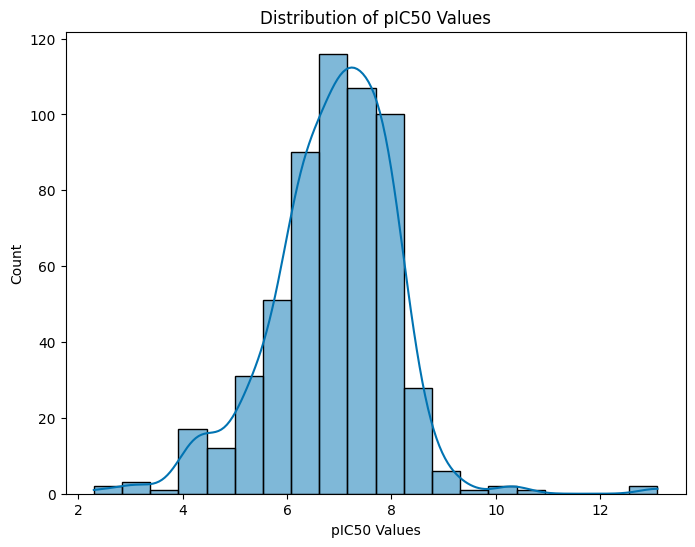

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color-blind friendly color palette
color_palette = sns.color_palette("colorblind")

# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=output_df, x="pIC50", kde=True, bins=20, color=color_palette[0], label='Data Distribution')

# Set plot labels and title
plt.xlabel("pIC50 Values")
plt.title("Distribution of pIC50 Values")

# Show the plot
plt.show()


In [ ]:
# Add molecule column
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")

In [ ]:
# Sort molecules by pIC50
output_df.sort_values(by="pIC50", ascending=False, inplace=True)

# Reset index
output_df.reset_index(drop=True, inplace=True)

In [ ]:
output_df.drop("smiles", axis=1).head(30)

,molecule_chembl_id,IC50,units,pIC50,ROMol
0,CHEMBL4529967,0.000080,nM,13.096910,<rdkit.Chem.rdchem.Mol object at 0x7e34b11878b0>
1,CHEMBL5202283,0.000080,nM,13.096910,<rdkit.Chem.rdchem.Mol object at 0x7e3465f85770>
2,CHEMBL5182195,0.040000,nM,10.397940,<rdkit.Chem.rdchem.Mol object at 0x7e3465f85700>
3,CHEMBL4865838,0.051000,nM,10.292430,<rdkit.Chem.rdchem.Mol object at 0x7e3465f7d700>
4,CHEMBL4862360,0.058000,nM,10.236572,<rdkit.Chem.rdchem.Mol object at 0x7e3465f7d690>
5,CHEMBL5196746,0.480000,nM,9.318759,<rdkit.Chem.rdchem.Mol object at 0x7e3465f85690>
6,CHEMBL4636767,0.500000,nM,9.301030,<rdkit.Chem.rdchem.Mol object at 0x7e34b11b42e0>
7,CHEMBL4869408,0.820000,nM,9.086186,<rdkit.Chem.rdchem.Mol object at 0x7e3465f7fae0>
8,CHEMBL4092122,0.920000,nM,9.036212,<rdkit.Chem.rdchem.Mol object at 0x7e34b11876f0>
9,CHEMBL4441950,0.920000,nM,9.036212,<rdkit.Chem.rdchem.Mol object at 0x7e34b1187760>


In [ ]:
# Prepare saving the dataset: Drop the ROMol column
output_df = output_df.drop("ROMol", axis=1)
print(f"DataFrame shape: {output_df.shape}")

DataFrame shape: (570, 5)


In [ ]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL4529967,0.00008,nM,N#Cc1cc(COc2cc(CCc3cccc(-c4ccccc4)c3Br)c(Cl)cc...,13.096910
1,CHEMBL5202283,0.00008,nM,N#Cc1cc(COc2cc(CCc3cccc(-c4ccccc4)c3Br)ccc2CN2...,13.096910
2,CHEMBL5182195,0.04000,nM,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CN[C@H](CCO)C(=O...,10.397940
3,CHEMBL4865838,0.05100,nM,CS(=O)(=O)c1cncc(COc2nc(O[C@H]3CCc4c(-c5cccc6c...,10.292430
4,CHEMBL4862360,0.05800,nM,C[C@@](CO)(NCc1cc(Cl)c(O[C@H]2CCc3c(-c4cccc5c4...,10.236572


In [ ]:
# Add column for activity
output_df["active"] = np.zeros(len(output_df))

# Mark every molecule as active with an pIC50 of >= 6.3, 0 otherwise
output_df.loc[output_df[output_df.pIC50 >= 6.3].index, "active"] = 1.0

# NBVAL_CHECK_OUTPUT
print("Number of active compounds:", int(output_df.active.sum()))
print("Number of inactive compounds:", len(output_df) - int(output_df.active.sum()))

Number of active compounds: 422
Number of inactive compounds: 148


In [ ]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50,active
0,CHEMBL4529967,0.00008,nM,N#Cc1cc(COc2cc(CCc3cccc(-c4ccccc4)c3Br)c(Cl)cc...,13.096910,1.0
1,CHEMBL5202283,0.00008,nM,N#Cc1cc(COc2cc(CCc3cccc(-c4ccccc4)c3Br)ccc2CN2...,13.096910,1.0
2,CHEMBL5182195,0.04000,nM,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CN[C@H](CCO)C(=O...,10.397940,1.0
3,CHEMBL4865838,0.05100,nM,CS(=O)(=O)c1cncc(COc2nc(O[C@H]3CCc4c(-c5cccc6c...,10.292430,1.0
4,CHEMBL4862360,0.05800,nM,C[C@@](CO)(NCc1cc(Cl)c(O[C@H]2CCc3c(-c4cccc5c4...,10.236572,1.0


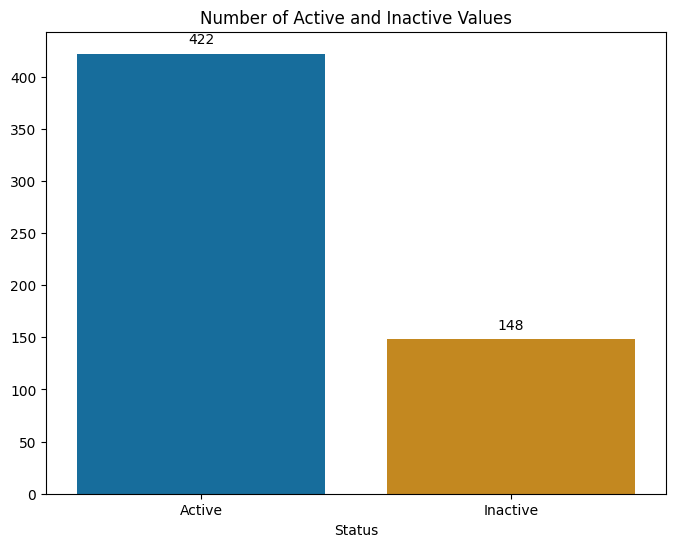

In [ ]:
import matplotlib.pyplot as plt


# Ensure plots are displayed inline
%matplotlib inline

# Rename the values in the 'active' column
output_df['active'] = output_df['active'].map({0: 'Inactive', 1: 'Active'})

# Count the occurrences of "Active" and "Inactive"
active_counts = output_df['active'].value_counts()[['Active', 'Inactive']]  # Ensure order

# Set the colorblind palette
sns.set_palette("colorblind")

# Plot the counts
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=active_counts.index, y=active_counts.values)

# Display the count above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Number of Active and Inactive Values')
plt.xlabel('Status')
plt.show()


In [ ]:
# Save DataFrame to CSV
output_df.to_csv('pd1pdl1_complex_compounds.csv', index=False)

# Download the CSV file in Google Colab
from google.colab import files
files.download('pd1pdl1_complex_compounds.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Awesome! now, as a bonus, we will visualize the top 30 compounds with the greatest pIC50 values.

Copy and paste the following code in the next cell.

Remove the hashtag "#" in the "#img" part of the code and run the cell

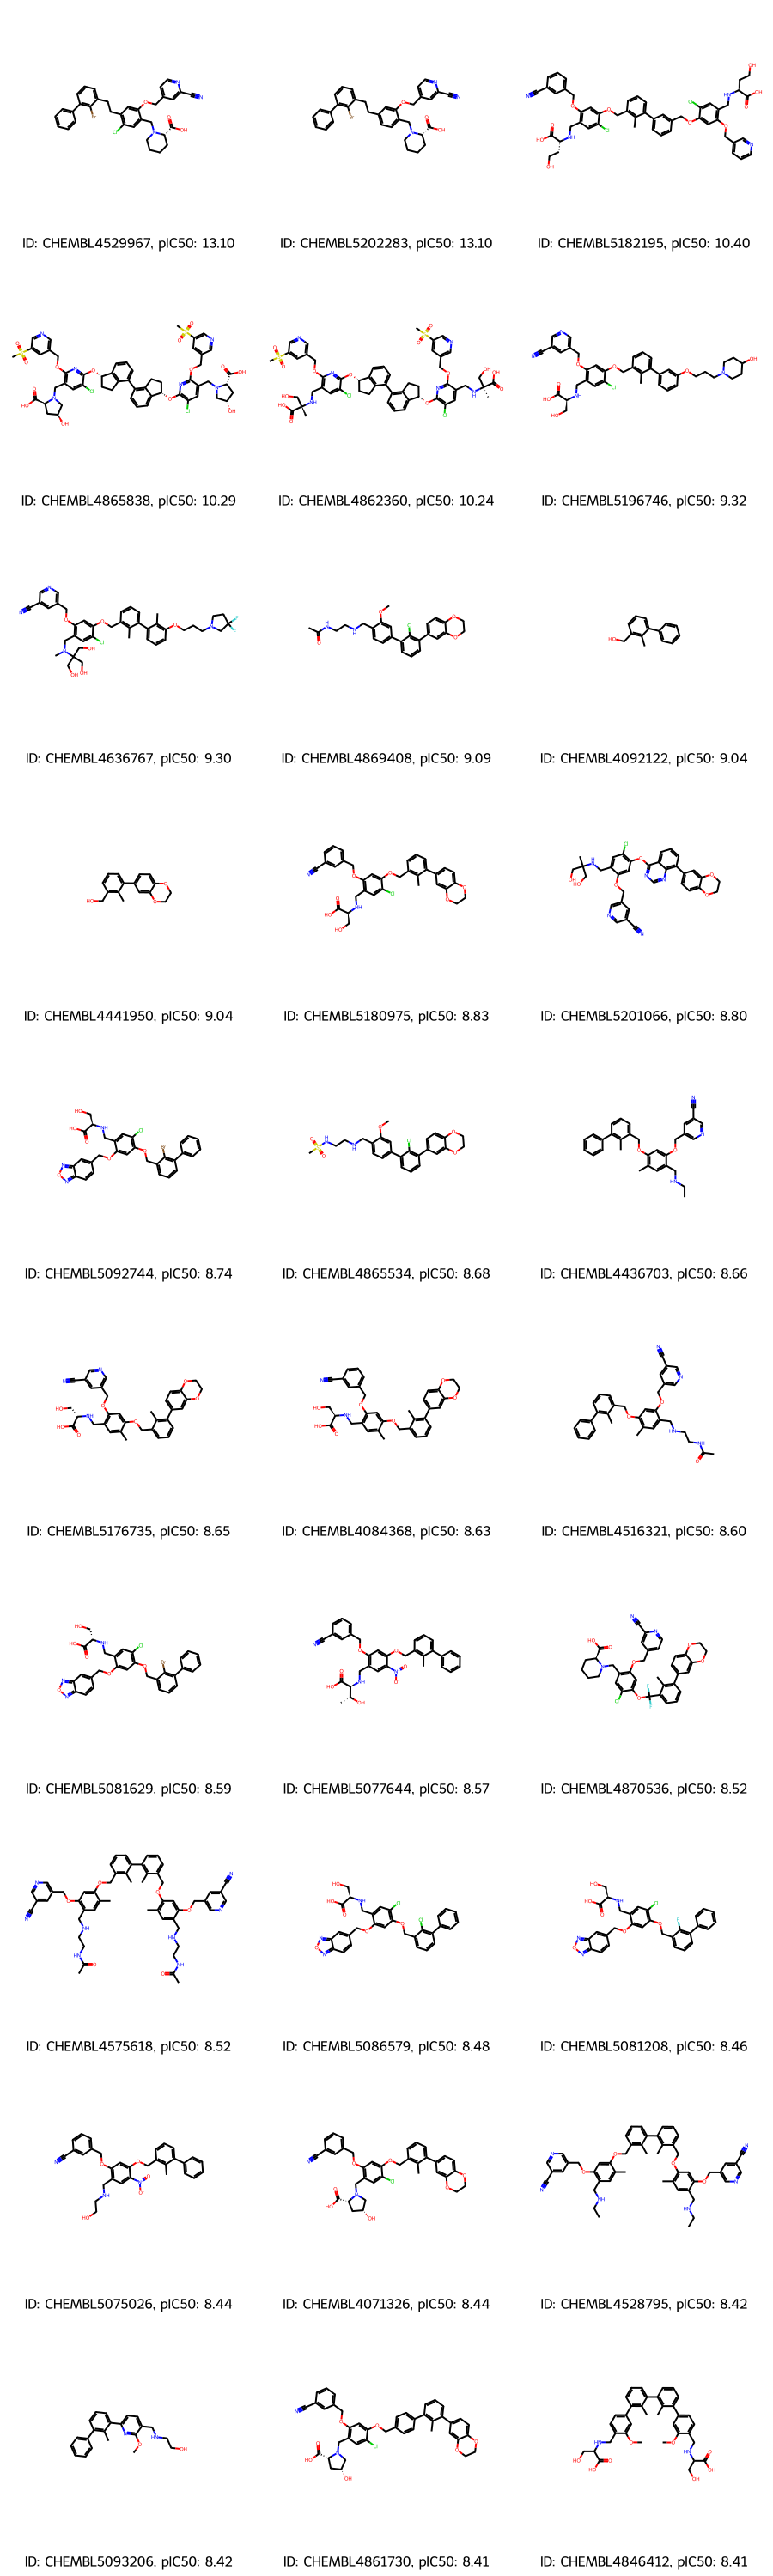

In [ ]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw

# Add molecule column to DataFrame for rendering the structure
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")

# Create legends that include both the molecule_chembl_id and pIC50 value
legends = [f"ID: {row['molecule_chembl_id']}, pIC50: {row['pIC50']:.2f}"
           for _, row in output_df.head(30).iterrows()]

# Draw the top 30 molecules in a grid using Chem.Draw.MolsToGridImage
img = Chem.Draw.MolsToGridImage(
    list(output_df.head(30).ROMol),
    legends=legends,
    molsPerRow=3,
    subImgSize=(300, 300)
)

# Display the image

img
